In [ ]:
# ..... run differential abundance analysis on KS cell types ..... #

In [2]:
library(Seurat)
library(SingleCellExperiment)
library(dplyr)
library(speckle)
library(ggplot2)

In [97]:
# load data
get_seurat_obj <- function(currstage1){
    
    sc1 = readRDS(paste0(currstage1, '_integrated_cca.rds'))

    df1 = read.delim(paste0(currstage1, '_cluster_anno_Knight-Schrijver.csv'), sep = ',')
    ids = match(rownames(sc1@meta.data), df1$barcode)
    sc1$metacell = df1$metacell[ids]
    sc1$celltype = df1$consensus_type[ids]
    sc1$cluster = df1$cluster[ids]
    sc1$celltype2 = df1$celltype2[ids]

    sc1$stage <- sc1$orig.ident
    sc1 <- sc1[,!is.na(sc1$celltype)]
    return(sc1)
}

In [98]:
# load individual sample files
stage1 = 'stage23'
sce1 = get_seurat_obj(stage1)
stage2 = 'stage28'
sce2 = get_seurat_obj(stage2)
stage3 = 'stage32'
sce3 = get_seurat_obj(stage3)

In [101]:
# get metadata
cols = c('stage', 'sample', 'metacell', 'celltype', 'cluster', 'celltype2')
mtd1 = sce1@meta.data[,cols]
mtd2 = sce2@meta.data[,cols]
mtd3 = sce3@meta.data[,cols]
mtd0 = rbind(mtd1, mtd2, mtd3)

In [102]:
# make SCE object
sce = SingleCellExperiment(list(counts = cbind(sce1@assays$RNA@counts,
                                               sce2@assays$RNA@counts,
                                               sce3@assays$RNA@counts)),
                           colData = DataFrame(mtd0))
sce

class: SingleCellExperiment 
dim: 17007 66561 
metadata(0):
assays(1): counts
rownames(17007): SPRY2 PCDH20 ... ENSGALG00010000495 ENSGALG00010000377
rowData names(0):
colnames(66561): stage23_sample3_AAACCCAAGTAACAGT-1
  stage23_sample3_AAACCCACAACAGAGC-1 ...
  stage32_sample12_TTTGTTGGTAGACGGT-1
  stage32_sample12_TTTGTTGGTGCTCGTG-1
colData names(6): stage sample ... cluster celltype2
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [103]:
mtd0$combined_mc = paste0(mtd0$sample, '|', mtd0$metacell)
mtd0[1,]

stage   sample  metacell celltype   
stage23_sample3_AAACCCAAGTAACAGT-1 stage23 sample3 42       Endocardial
                                   cluster    celltype2         combined_mc
stage23_sample3_AAACCCAAGTAACAGT-1 cluster_24 Pericytes_Stromal sample3|42

In [104]:
sce2 = CreateSeuratObject(counts = counts(sce), meta.data = mtd0)
sce2

An object of class Seurat 
17007 features across 66561 samples within 1 assay 
Active assay: RNA (17007 features, 0 variable features)

In [105]:
sce2$sample2 = paste0(sce2$stage, '_', sce2$sample)

In [106]:
sce2$sample2 <- factor(sce2$sample2, levels=c('stage23_sample3', 'stage23_sample10',
                                              'stage28_sample5', 'stage28_sample10', 'stage28_sample11',
                                              'stage32_sample5', 'stage32_sample10', 'stage32_sample12'))
sce2$group <- NA 
sce2$group[grep("stage23",sce2$sample2)] <- "stage23"
sce2$group[grep("stage28",sce2$sample2)] <- "stage28"
sce2$group[grep("stage32",sce2$sample2)] <- "stage32"
sce2$group <- factor(sce2$group, levels=c("stage23", "stage28","stage32"))

Performing logit transformation of proportions



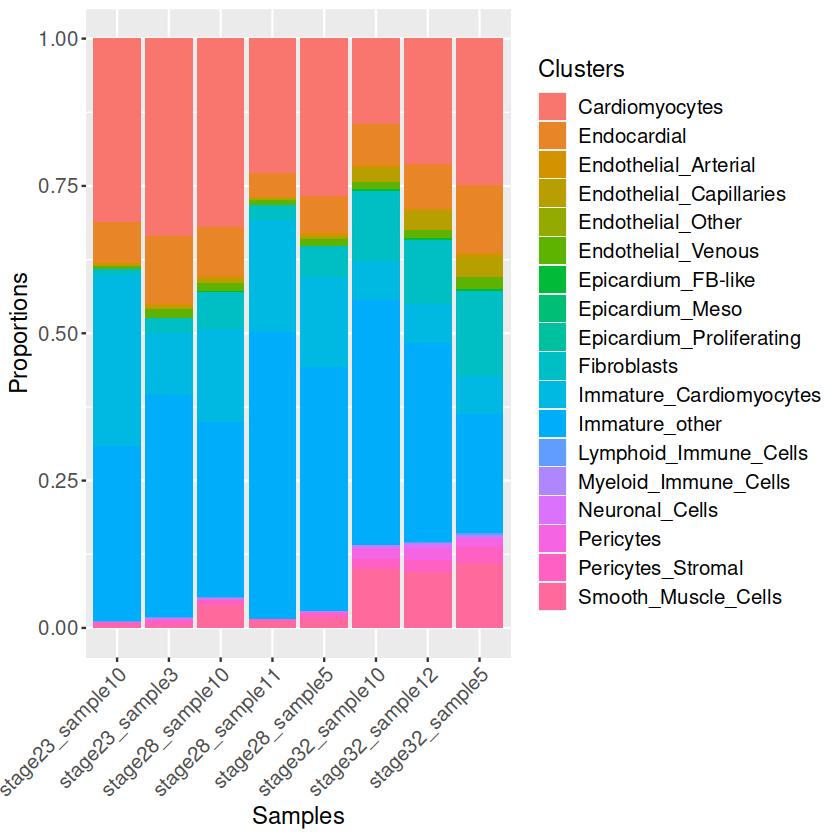

In [107]:
# png('aa-props.png', width = 8, height = 6, res = 300, units = 'in')
plotCellTypeProps(clusters=sce2$celltype2, sample=sce2$sample2) +
theme(axis.text.x = element_text(angle=45, hjust=1)) 
# dev.off()

In [108]:
# props
Idents(sce2) <- sce2$celltype2
out <- propeller(sce2, transform = "logit")
out

extracting sample information from Seurat object

Performing logit transformation of proportions

group variable has > 2 levels, ANOVA will be performed



BaselineProp PropMean.stage23 PropMean.stage28
Pericytes                6.024549e-03 -2.448610e-03    -5.423300e-03   
Neuronal_Cells           1.231953e-03 -8.266682e-04    -2.229274e-03   
Smooth_Muscle_Cells      3.951263e-02 -8.494802e-03    -1.167149e-02   
Epicardium_FB-like       9.915716e-04 -3.141046e-04    -3.428252e-04   
Endothelial_Capillaries  1.126786e-02 -2.601440e-03    -5.643859e-03   
Lymphoid_Immune_Cells    1.277024e-03  6.335495e-04    -1.053771e-04   
Epicardium_Meso          1.802858e-04  5.759418e-05    -2.924628e-05   
Fibroblasts              6.057601e-02 -1.762283e-03     5.271648e-04   
Pericytes_Stromal        1.128288e-02  2.826248e-03    -1.515980e-03   
Immature_Cardiomyocytes  1.493367e-01  7.471679e-02     1.345662e-01   
Endothelial_Other        2.103334e-04 -1.562513e-04     9.048784e-05   
Endothelial_Arterial     4.627334e-03  2.476226e-03     8.505742e-04   
Endocardial              7.606556e-02  6.620093e-02     1.203331e-02   
Immature_other           3.595499e-01  1.713313e-01     2.539884e-01   
Epicardium_Proliferating 1.502381e-05 -1.585389e-05     1.585389e-05   
Myeloid_Immune_Cells     1.352143e-03  9.670060e-04     3.807359e-04   
Endothelial_Venous       1.206412e-02  6.062893e-03     3.662653e-03   
Cardiomyocytes           2.644341e-01  1.913474e-01     1.208460e-01   
                         PropMean.stage32 Fstatistic  P.Value      FDR         
Pericytes                1.553988e-02     17.41812850 2.725228e-08 4.905411e-07
Neuronal_Cells           4.553407e-03     13.35736277 1.581143e-06 1.423028e-05
Smooth_Muscle_Cells      7.198171e-02      7.26149308 7.020590e-04 4.212354e-03
Epicardium_FB-like       1.928864e-03      4.79550680 8.266808e-03 3.720064e-02
Endothelial_Capillaries  2.308410e-02      4.55400474 1.052497e-02 3.788989e-02
Lymphoid_Immune_Cells    1.454049e-03      2.62396446 7.251481e-02 2.001426e-01
Epicardium_Meso          2.405500e-04      2.55318662 7.783325e-02 2.001426e-01
Fibroblasts              8.374895e-02      2.37374490 9.313130e-02 2.095454e-01
Pericytes_Stromal        1.518447e-02      2.18976418 1.119431e-01 2.238863e-01
Immature_Cardiomyocytes  1.030107e-02      1.09620586 3.341364e-01 5.862511e-01
Endothelial_Other        3.009321e-04      1.02648351 3.582646e-01 5.862511e-01
Endothelial_Arterial     3.823758e-03      0.65557422 5.191439e-01 7.787158e-01
Endocardial              4.725317e-02      0.35193370 7.033268e-01 9.215199e-01
Immature_other           1.058025e-01      0.31068818 7.329424e-01 9.215199e-01
Epicardium_Proliferating 1.585389e-05      0.22819381 7.959700e-01 9.215199e-01
Myeloid_Immune_Cells     8.178185e-04      0.17259019 8.414824e-01 9.215199e-01
Endothelial_Venous       8.643232e-03      0.13888928 8.703244e-01 9.215199e-01
Cardiomyocytes           1.053257e-01      0.04285983 9.580457e-01 9.580457e-01

In [109]:
# get the cell type counts and proportions
x <- getTransformedProps(clusters = sce2$celltype2, sample=sce2$sample2,
                         transform="logit")

Performing logit transformation of proportions



In [73]:
# Set up group information based on counts matrix/matrix of proportions
group <- factor(c(rep('stage23', 2), rep(c("stage28","stage32"), each=3)), 
                levels=c("stage23","stage28","stage32"))

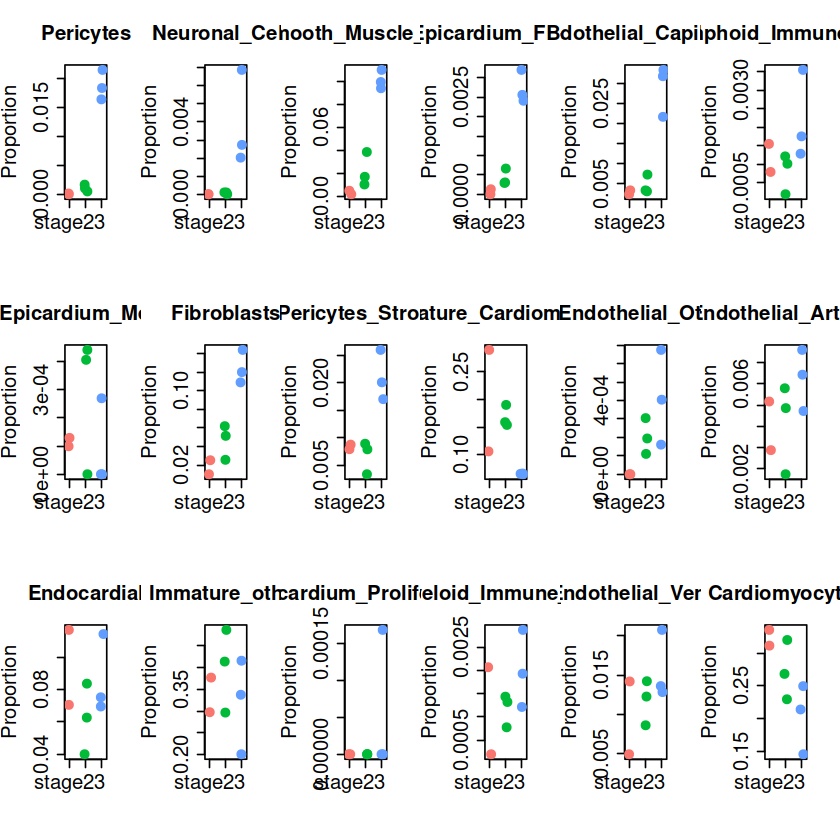

In [112]:
ct <- rownames(out)
# png('aa-stripchart2.png', width = 5, height = 15, res = 300, units = 'in')
par(mfrow=c(3,6))
for(i in 1:nrow(out)){      
    stripchart(x$Proportions[ct[i],]~group, vertical=TRUE, pch=16, 
             method="jitter", ylab="Proportion", main=ct[i], 
             col=ggplotColors(3), cex=1.5, cex.lab=1.5, cex.axis=1.5,
             cex.main=1.5)
}
# dev.off()

In [113]:
# plot gene expression
DefaultAssay(sce2) <- 'RNA'
Idents(sce2) <- sce2$celltype

In [117]:
sce2 = NormalizeData(sce2, normalization.method = "LogNormalize", scale.factor = 1e6)

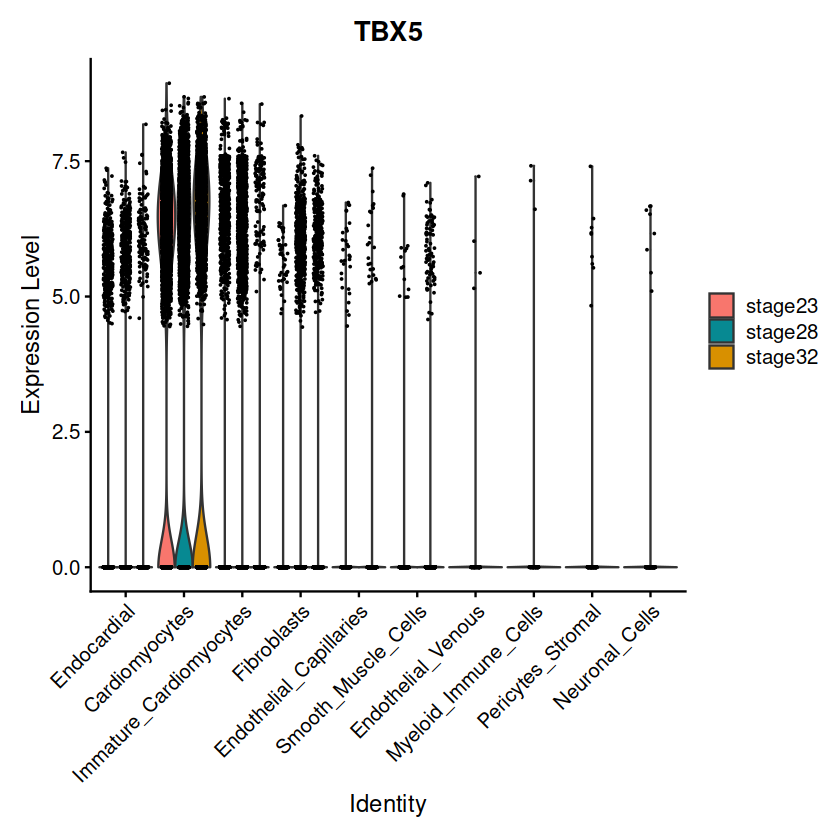

In [121]:
VlnPlot(sce2, features = 'TBX5', pt.size = 0.01, split.by = 'stage')